# Deploy the Bean Spot Model

This is the sequel of day 28. First you need to install this package in your device:

* ipykernel

* streamlit

* pyngrok

In [4]:
!ngrok authtoken 1YYYYYYYYYYYZZZZZZZZZZZZXXXXXXXX

Authtoken saved to configuration file: C:\Users\asus/.ngrok2/ngrok.yml


In [6]:
%%writefile score.py

import tensorflow as tf 
from io import BytesIO
import streamlit as st
from PIL import Image
import numpy as np 
import requests

st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Bean Spot Image Classifier')
st.text('Provide URL for Image Classification')

@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('./beans_spot.tf')
    return model

with st.spinner("Lodading Model into Memory..."):
    model = load_model()

classes = ['angular_leaf_spot', 'bean_rust', 'healthy']

def scale(image):
    image = tf.cast(image, tf.float32)
    image = image/255

    return tf.image.resize(image, [224,224])

def decode_img(image):
    img = tf.image.decode_jpeg(image, channels=3)
    img = scale(img)
    return np.expand_dims(img, axis=0)

path = st.text_input('Enter Image URL for Classification...','http://barmac.com.au/wp-content/uploads/sites/3/2016/01/Angular-Leaf-Spot-Beans1.jpg')
if path is not None:
    content = requests.get(path).content 

    st.write('Predicted Class:')
    with st.spinner("Classifying..."):
        label = np.argmax(model.predict(decode_img(content)), axis=1)
        st.write(classes[label[0]])
    st.write('')
    image = Image.open(BytesIO(content))
    st.image(image, caption='Classifying Bean Spot Image', use_column_width=True)

Overwriting score.py


In [8]:
!nohup streamlit run score.py &

t=2021-06-27T08:23:04+0700 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040
t=2021-06-27T08:23:04+0700 lvl=eror msg="failed to auth" obj=tunnels.session err="Your account 'cmglonly' is limited to 1 simultaneous ngrok client session.\nActive ngrok client sessions in region 'us':\n  - ts_1uVbPT8ZHDqf5PWwzyy8pxPHYet (223.27.158.146)\r\n\r\nERR_NGROK_108\r\n"


PyngrokNgrokError: The ngrok process errored on start: Your account 'cmglonly' is limited to 1 simultaneous ngrok client session.\nActive ngrok client sessions in region 'us':\n  - ts_1uVbPT8ZHDqf5PWwzyy8pxPHYet (223.27.158.146)\r\n\r\nERR_NGROK_108\r\n.

In [7]:
from pyngrok import ngrok 

url = ngrok.connect(port=8501)
url

OSError: Background processes not supported.

In [9]:
!cat nohup.out


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.91.12:8501

2021-06-27 07:39:23.260392: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.91.12:8501

2021-06-27 07:39:47.869885: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-06-27 07:39:47.934033: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: GeForce MX150 computeCapability: 6.1
coreClock: 1.5315GHz coreCount: 3 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 44.76GiB/s
2021-06-27 07:39:47.953408: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-06-27 07:39:47.99830

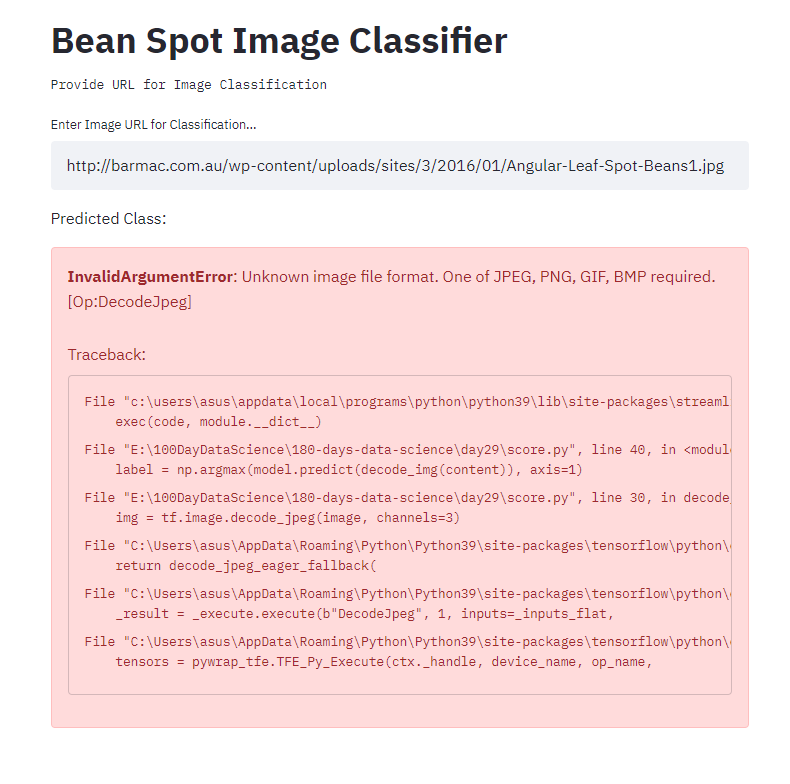

In [16]:
from IPython.display import Image

failed = Image('fail.png')
display(failed)

## FAILED AGAIN

Well, this is second times that can be counted I failed to deploy a model again. 

I think I was follow the instruction very carefull [link](https://www.youtube.com/watch?v=AIDo3GO9t5A&t=693s&ab_channel=AIEngineering)

But yeah, it *still* failed. And it just only the second failed

FYI, I was trying to debug, but perhaps I got my real enemy => myself

So, Oke let's see tomorrow with better days